In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime as dt

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a60635b4137b098fb9f05d9cb66e365215c8037372134d9b0147b1a4c57d37c6
  Stored in directory: c:\users\devan\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
crypto = 'ETH'
currency = 'INR'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

info = pdr.DataReader(f'{crypto}-{currency}', 'yahoo', start, end)
info.shape

NameError: name 'dt' is not defined

In [69]:
scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(info['Close'].values.reshape(-1, 1))

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [1]:
din = 100

X, y = [], []

for i in range(din, len(close)):
    X.append(close[i-din:i, 0])
    y.append(close[i,0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_test)

NameError: name 'close' is not defined

In [48]:
mod = Sequential()

mod.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
mod.add(Dropout(0.2))
mod.add(LSTM(units=50, return_sequences=True))
mod.add(Dropout(0.2))
mod.add(LSTM(units=50))
mod.add(Dropout(0.2))
mod.add(Dense(units=1))

mod.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
history = mod.fit(X_train, y_train, epochs=50, batch_size=16,
                  shuffle=False, validation_split=0.2)

Epoch 1/50
49/49 [==============================] - 10s 95ms/step - loss: 0.0106 - val_loss: 0.0031
Epoch 2/50
49/49 [==============================] - 4s 72ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 3/50
49/49 [==============================] - 3s 70ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 4/50
49/49 [==============================] - 3s 68ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 5/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/50
49/49 [==============================] - 3s 70ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 7/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 9/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 10/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 11

In [50]:
# serialize model to JSON
model_json = mod.to_json()
with open("eth_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
mod.save_weights("eth_model.h5")
print("Saved model to disk")

Saved model to disk


In [51]:
# load json and create model
json_file = open('eth_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("eth_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [66]:
# we use test dataset here
predicted_price = loaded_model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test.reshape(-1, 1))

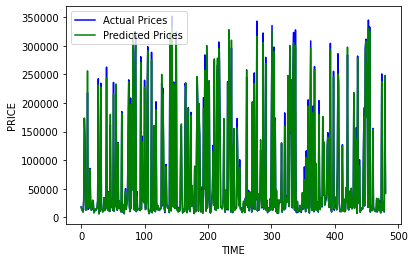

In [58]:
# change the crypto name
# plt.figure(figsize=(10, 4))
plt.plot(real_price, color='blue', label='Actual Prices')
plt.plot(predicted_price, color='green', label='Predicted Prices')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.show()

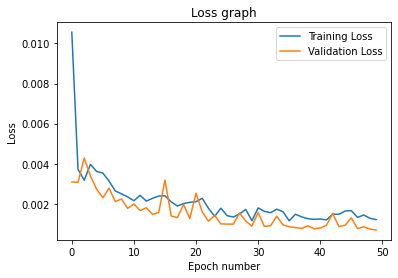

In [59]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend(loc="upper right")
plt.savefig("adam_loss_ethereum.png")
plt.show()